# Kelompok 5

### Import Library

In [2]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns
import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras import regularizers
import os
import glob 
import pandas as pd
import IPython.display as ipd
import plotly.express as px
import scipy.io.wavfile
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 
print("Python Version: {}".format(sys.version))
print("Keras Version: {}".format(keras.__version__))

Python Version: 3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)]
Keras Version: 3.3.3


### Inisiasi Dataset

In [3]:
RAV = 'Dataset/RAVDESS/audio_speech_actors_01-24/'
dir_list = os.listdir(RAV)

### Memproses data dari dataset RAVDESS dan membuat DataFrame.

In [4]:
emotion = []
gender = []
path = []
feature = []
for i in dir_list:
    fname = os.listdir(RAV + i)
    for f in fname:
        part = f.split('.')[0].split('-')
        emotion.append(int(part[2]))
        temp = int(part[6])
        if temp%2 == 0:
            temp = "female"
        else:
            temp = "male"
        gender.append(temp)
        path.append(RAV + i + '/' + f)

RAV_df = pd.DataFrame(emotion)
RAV_df = RAV_df.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
RAV_df = pd.concat([pd.DataFrame(gender),RAV_df],axis=1)
RAV_df.columns = ['gender','emotion']
RAV_df['labels'] =RAV_df.gender + '_' + RAV_df.emotion
RAV_df['source'] = 'RAVDESS'
RAV_df = pd.concat([RAV_df,pd.DataFrame(path, columns = ['path'])],axis=1)
RAV_df = RAV_df.drop(['gender'], axis=1)
RAV_df.labels.value_counts()

labels
male_neutral       144
female_neutral     144
male_happy          96
male_sad            96
male_angry          96
male_fear           96
male_disgust        96
male_surprise       96
female_happy        96
female_sad          96
female_angry        96
female_fear         96
female_disgust      96
female_surprise     96
Name: count, dtype: int64

In [5]:
display(RAV_df.head())

emotion        labels   source  \
0  neutral  male_neutral  RAVDESS   
1  neutral  male_neutral  RAVDESS   
2  neutral  male_neutral  RAVDESS   
3  neutral  male_neutral  RAVDESS   
4  neutral  male_neutral  RAVDESS   

                                                path  
0  Dataset/RAVDESS/audio_speech_actors_01-24/Acto...  
1  Dataset/RAVDESS/audio_speech_actors_01-24/Acto...  
2  Dataset/RAVDESS/audio_speech_actors_01-24/Acto...  
3  Dataset/RAVDESS/audio_speech_actors_01-24/Acto...  
4  Dataset/RAVDESS/audio_speech_actors_01-24/Acto...

In [6]:
display(RAV_df.describe())

emotion        labels   source  \
count      1440          1440     1440   
unique        7            14        1   
top     neutral  male_neutral  RAVDESS   
freq        288           144     1440   

                                                     path  
count                                                1440  
unique                                               1440  
top     Dataset/RAVDESS/audio_speech_actors_01-24/Acto...  
freq                                                    1

### Visualisasi Data

In [5]:
px_fig = px.histogram(RAV_df, x='emotion', color='emotion', marginal='box',  
                      title='Jumlah Emosi')
px_fig.update_layout(bargap=0.2)
px_fig.show()

px_fig = px.histogram(RAV_df, x='labels', color='emotion', marginal='box',  
                      title='Jumlah Label')
px_fig.update_layout(bargap=0.2)
px_fig.show()

Mernampilkan emosi

In [6]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot untuk audio dengan emosi {}'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

In [7]:
def create_spectrogram(data, sr, e):
    # Fungsi stft mengubah data menjadi transformasi Fourier jangka pendek
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram untuk audio dengan emosi {}'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

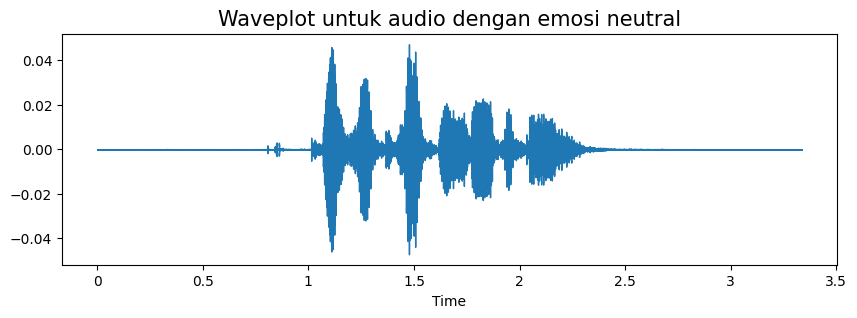

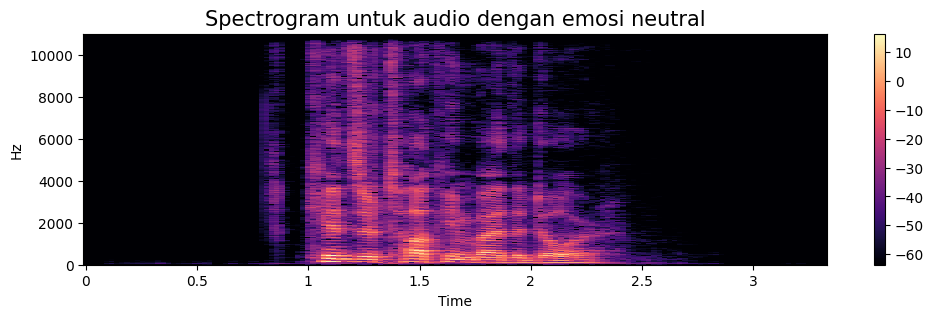

In [8]:
emotion='neutral'
path = np.array(RAV_df.path[RAV_df.emotion==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
ipd.Audio(path)

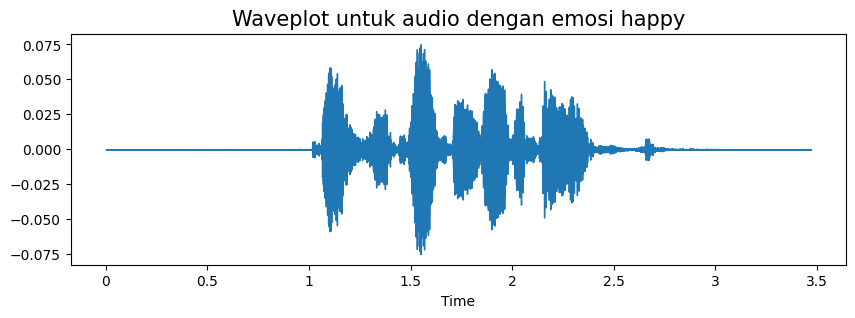

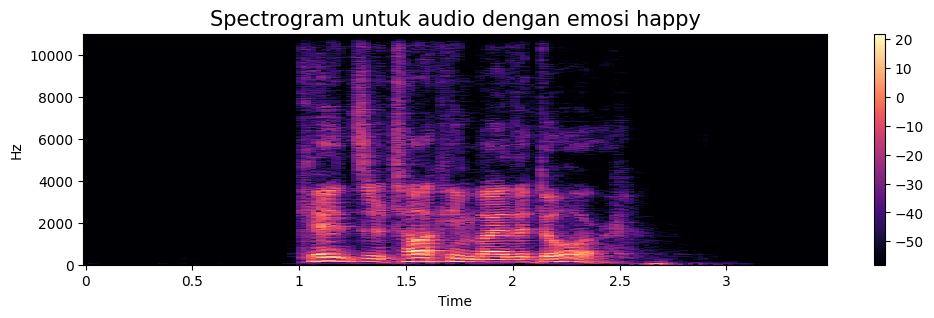

In [9]:
emotion='happy'
path = np.array(RAV_df.path[RAV_df.emotion==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
ipd.Audio(path)

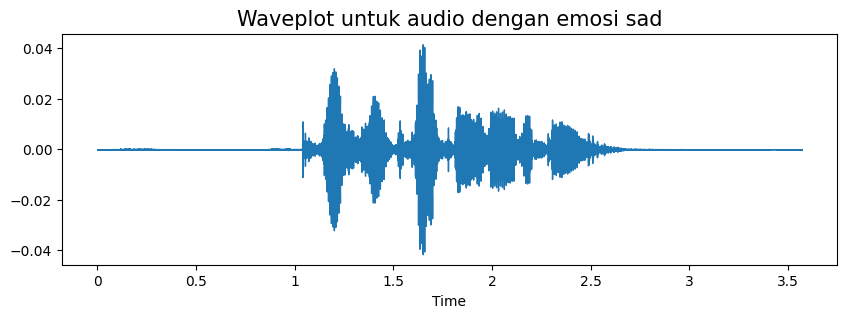

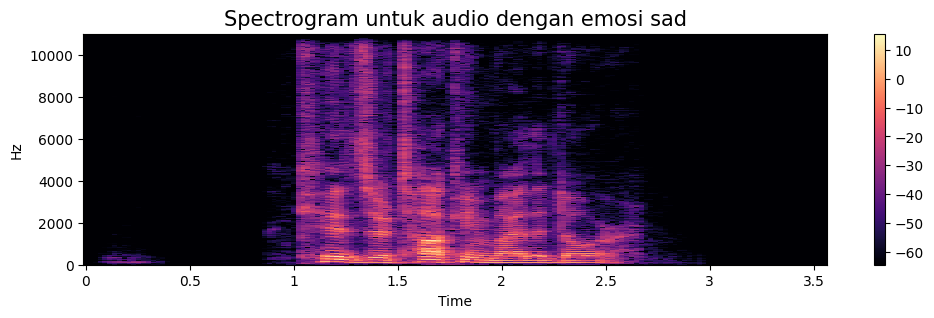

In [10]:
emotion='sad'
path = np.array(RAV_df.path[RAV_df.emotion==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
ipd.Audio(path)

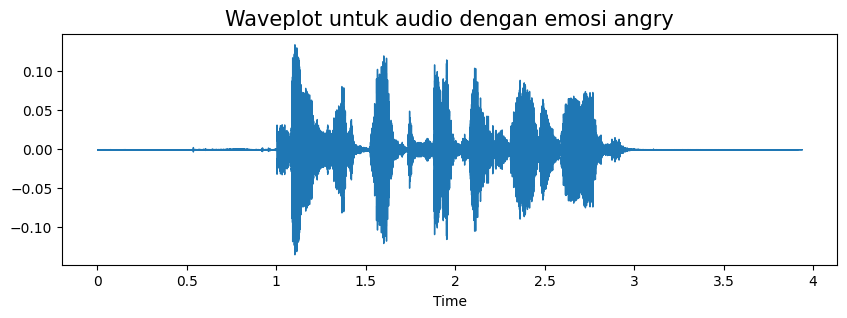

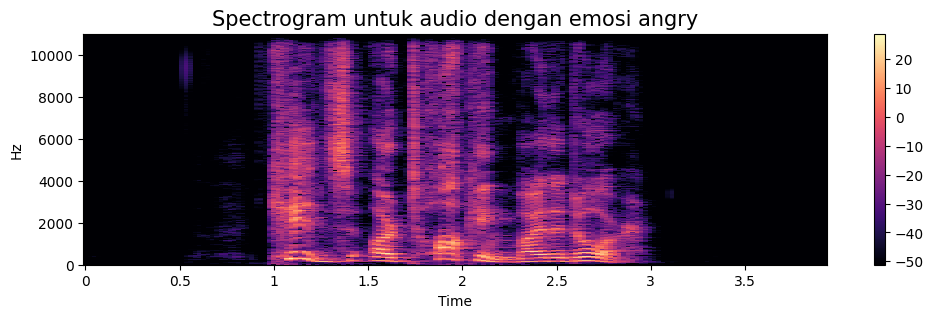

In [11]:
emotion='angry'
path = np.array(RAV_df.path[RAV_df.emotion==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
ipd.Audio(path)

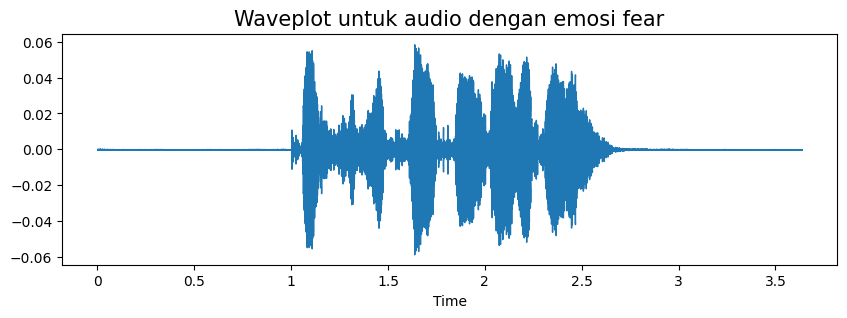

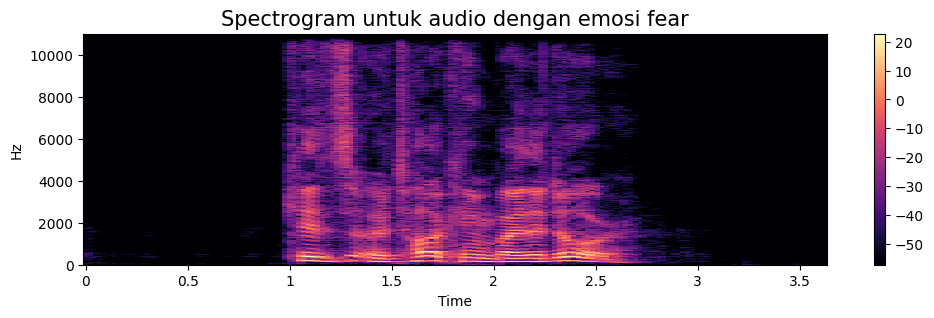

In [12]:
emotion='fear'
path = np.array(RAV_df.path[RAV_df.emotion==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
ipd.Audio(path)

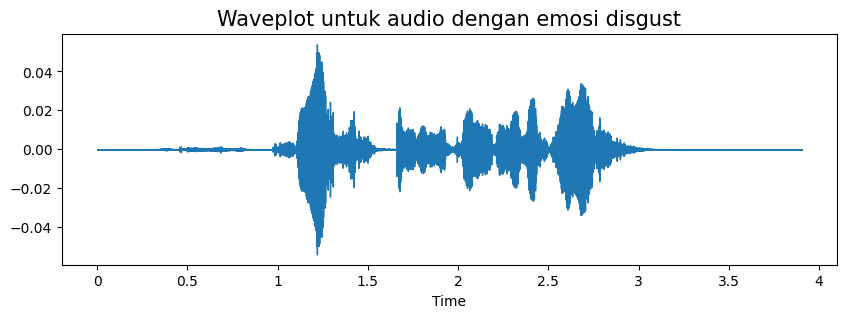

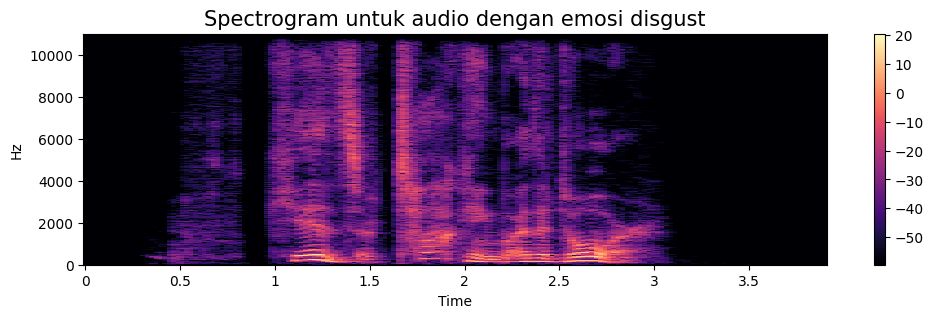

In [13]:
emotion='disgust'
path = np.array(RAV_df.path[RAV_df.emotion==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
ipd.Audio(path)

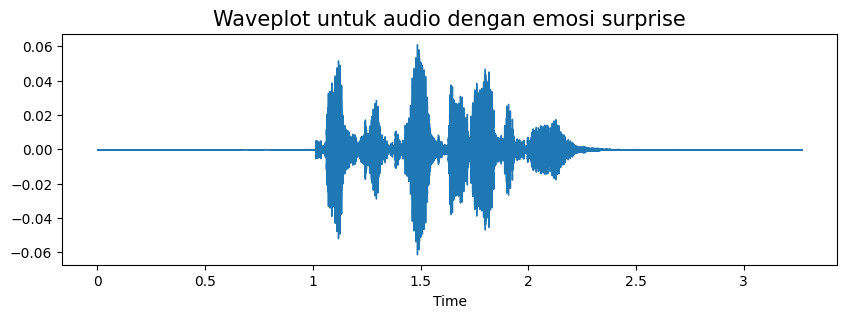

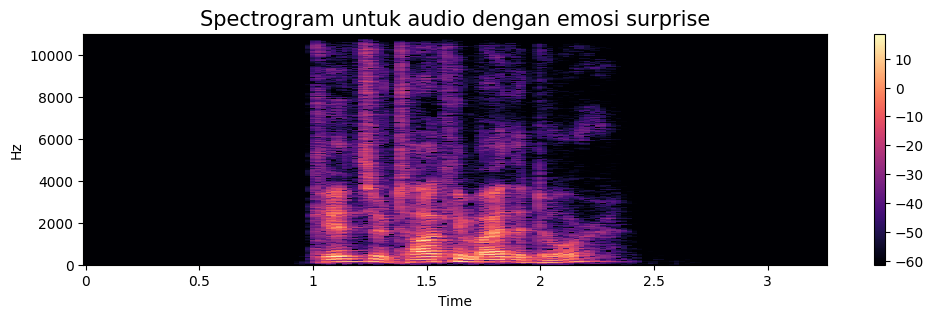

In [14]:
emotion='surprise'
path = np.array(RAV_df.path[RAV_df.emotion==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
ipd.Audio(path)

### Preprocessing dengan augmentasi data
Menambahkan noise, stretch, shift, dan pitch

In [17]:
def noise(data):
    # Menambahkan noise acak ke data audio
    noise_amp = 0.035 * np.random.uniform() * np.amax(data)
    data = data + noise_amp * np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    # Mengubah durasi data audio dengan rasio tertentu
    return librosa.effects.time_stretch(data, rate=rate)

def shift(data):
    # Menggeser data audio secara acak
    shift_range = int(np.random.uniform(low=-5, high=5) * 1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    # Mengubah pitch data audio
    return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=pitch_factor)

# Mengambil contoh data audio dan menerapkan teknik augmentasi
path = np.array(RAV_df.path)[1]
data, sample_rate = librosa.load(path)

### Audio Original

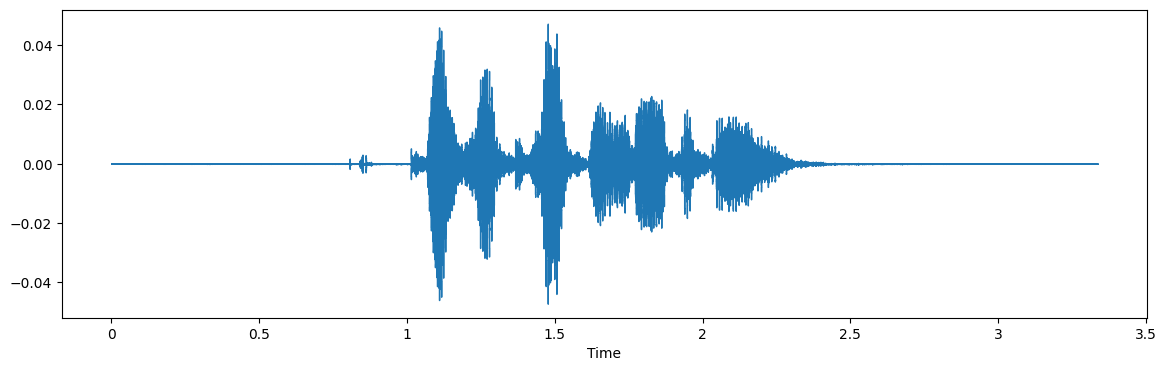

In [18]:
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=data, sr=sample_rate)
ipd.Audio(path)

### Noise

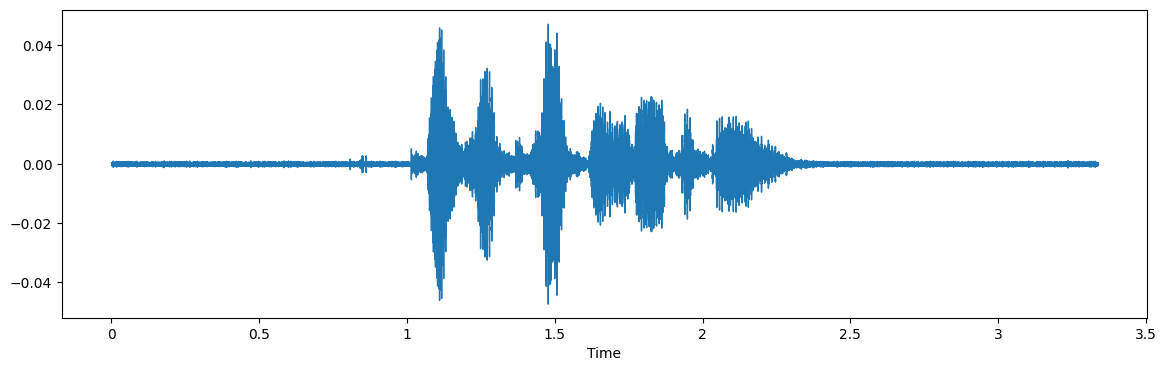

In [19]:
x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
ipd.Audio(x, rate=sample_rate)

### Stretch

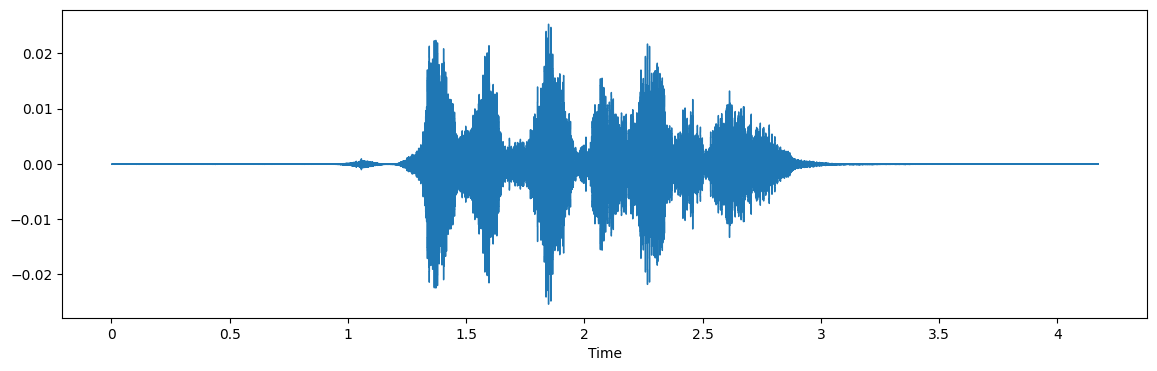

In [20]:
x = stretch(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
ipd.Audio(x, rate=sample_rate)

### Shifting
Tidak dipakai, karena data yang dihasilkan dari shifting mirip dengan data/audio originalnya, sehingga tidak menambah banyak variasi.

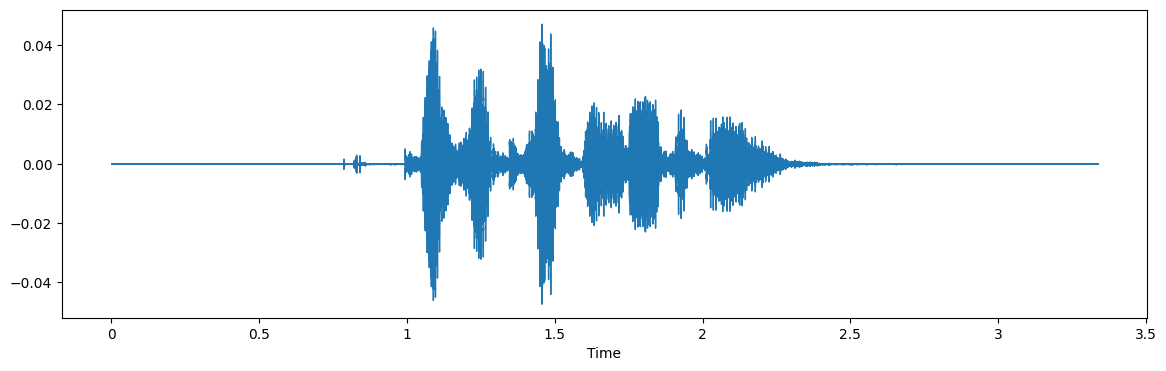

In [21]:
x = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
ipd.Audio(x, rate=sample_rate)

### Pitch

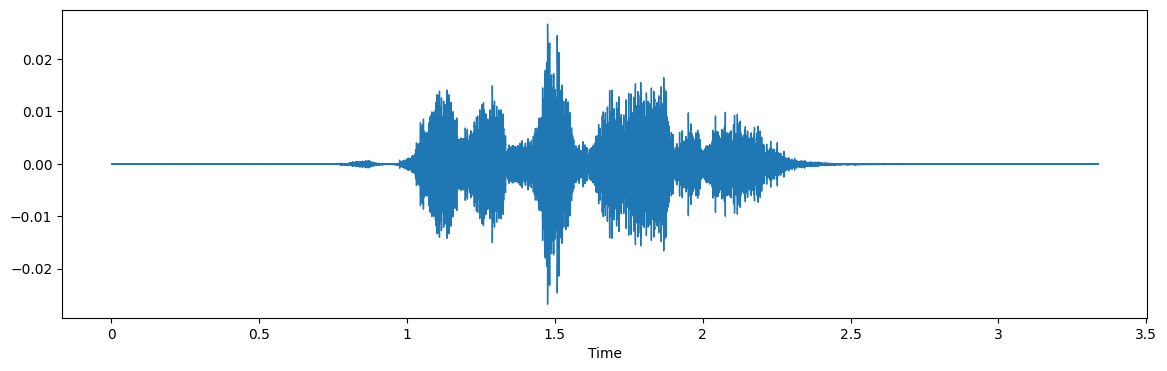

In [22]:
x = pitch(data,sample_rate)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
ipd.Audio(x, rate=sample_rate)

## Ekstraksi Fitur

Menggunakan 5 jenis ekstraksi fitur:
- Zero Crossing Rate (ZCR): Membantu mendeteksi frekuensi sinyal melewati nol, berguna untuk membedakan jenis suara.

- Chroma STFT: Menangkap konten harmonik, berguna untuk mengidentifikasi nada dan akor musik.

- **MFCC**: Merepresentasikan spektrum daya jangka pendek, umum digunakan dalam pengenalan suara dan musik.

- Root Mean Square (RMS): Mengukur energi sinyal, menunjukkan tingkat kekerasan suara.

- Mel Spectrogram: Menyediakan representasi frekuensi yang terperinci, berguna untuk mengidentifikasi tekstur timbre.

Selanjutnya:
Fungsi ``get_features(path)`` memuat data audio dan melakukan ekstraksi fitur dengan 3 augmentasi yang sudah dilakukan, noise, stretch, dan pitch

In [23]:
def extract_features(data):
    # ZCR (Zero Crossing Rate)
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # menggabungkan secara horizontal

    # Chroma STFT
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # menggabungkan secara horizontal

    # MFCC (Mel-frequency Cepstral Coefficients)
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # menggabungkan secara horizontal

    # Nilai Root Mean Square
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # menggabungkan secara horizontal

    # Mel Spectrogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # menggabungkan secara horizontal
    
    return result

def get_features(path):
    # durasi dan offset digunakan untuk menangani bagian tanpa audio di awal dan akhir setiap file audio
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # tanpa augmentasi
    res1 = extract_features(data)
    result = np.array(res1)
    
    # data dengan noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # menggabungkan secara vertikal
    
    # data dengan stretching dan pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # menggabungkan secara vertikal
    
    return result

### Proses Ekstraksi Fitur dan Menyiapkan data
Emosi ditambahkan ke list `Y` sebanyak tiga kali, sesuai dengan tiga teknik augmentasi yang diterapkan pada setiap file audio.

In [24]:
X, Y = [], []
for path, emotion in zip(RAV_df.path, RAV_df.emotion):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # menambahkan emosi 3 kali karena ada 3 teknik augmentasi pada setiap file audio
        Y.append(emotion)

In [25]:
len(X), len(Y), RAV_df.path.shape

(4320, 4320, (1440,))

In [26]:
# Membuat DataFrame dari fitur dan label
Features = pd.DataFrame(X)
Features['labels'] = Y

# Menyimpan DataFrame ke file CSV
Features.to_csv('features.csv', index=False)

In [27]:
# Menampilkan beberapa baris pertama dan deskripsi statistik DataFrame
display(Features.head())
display(Features.describe())

0         1         2         3         4         5         6  \
0  0.321275  0.729664  0.750033  0.730624  0.735275  0.713529  0.660531   
1  0.318540  0.765175  0.816186  0.815366  0.812332  0.815063  0.743910   
2  0.188227  0.622132  0.699217  0.753340  0.721217  0.701731  0.682358   
3  0.293566  0.673896  0.722096  0.723508  0.682302  0.680533  0.675352   
4  0.338564  0.804426  0.837226  0.822776  0.799438  0.804204  0.755350   

          7         8         9  ...           153           154  \
0  0.684966  0.733049  0.753972  ...  4.310903e-06  3.291511e-06   
1  0.660775  0.697803  0.749783  ...  5.073058e-05  5.067965e-05   
2  0.662839  0.686496  0.733970  ...  8.579046e-07  9.576654e-07   
3  0.628977  0.679179  0.707283  ...  6.984504e-06  7.034949e-06   
4  0.667711  0.705369  0.746767  ...  1.760062e-04  1.757412e-04   

            155           156           157           158       159       160  \
0  2.148075e-06  2.279739e-06  5.116492e-06  8.190282e-06  0.000007  0.000005   
1  5.033732e-05  5.082376e-05  5.436353e-05  5.916957e-05  0.000058  0.000055   
2  7.733597e-07  5.233100e-07  3.593209e-07  9.263777e-07  0.000002  0.000001   
3  6.654922e-06  6.979548e-06  1.214236e-05  9.640185e-06  0.000011  0.000006   
4  1.788651e-04  1.777914e-04  1.823975e-04  1.815192e-04  0.000182  0.000178   

            161   labels  
0  4.245834e-07  neutral  
1  4.835105e-05  neutral  
2  7.753991e-08  neutral  
3  4.254087e-07  neutral  
4  1.708375e-04  neutral  

[5 rows x 163 columns]

0            1            2            3            4    \
count  4320.000000  4320.000000  4320.000000  4320.000000  4320.000000   
mean      0.210664     0.627814     0.631013     0.635849     0.645832   
std       0.068855     0.088229     0.097752     0.100577     0.102382   
min       0.060041     0.339261     0.287358     0.274466     0.261137   
25%       0.154523     0.568429     0.565212     0.565526     0.574838   
50%       0.201512     0.630815     0.635756     0.641475     0.652834   
75%       0.267144     0.691858     0.702722     0.710410     0.721612   
max       0.394341     0.865724     0.877686     0.888288     0.892437   

               5            6            7            8            9    ...  \
count  4320.000000  4320.000000  4320.000000  4320.000000  4320.000000  ...   
mean      0.635052     0.606581     0.600662     0.619972     0.637331  ...   
std       0.105016     0.091609     0.078656     0.080572     0.079083  ...   
min       0.263631     0.269489     0.262952     0.242528     0.269619  ...   
25%       0.565135     0.549886     0.554538     0.568353     0.584987  ...   
50%       0.642235     0.615525     0.609363     0.626247     0.644008  ...   
75%       0.707867     0.670466     0.656275     0.678465     0.693071  ...   
max       0.902175     0.889288     0.790399     0.825856     0.868182  ...   

                152           153           154           155           156  \
count  4.320000e+03  4.320000e+03  4.320000e+03  4.320000e+03  4.320000e+03   
mean   1.688172e-03  1.702568e-03  1.744274e-03  1.773123e-03  1.825027e-03   
std    5.754552e-03  5.828611e-03  5.974651e-03  6.156919e-03  6.461084e-03   
min    2.135495e-08  1.693106e-08  2.129203e-08  2.401496e-08  2.901137e-08   
25%    2.869177e-05  2.916063e-05  3.013219e-05  3.169604e-05  3.438836e-05   
50%    1.693696e-04  1.705940e-04  1.707699e-04  1.821854e-04  1.883760e-04   
75%    8.502220e-04  8.611990e-04  9.218309e-04  9.016337e-04  9.261053e-04   
max    8.762533e-02  8.978813e-02  9.574332e-02  9.337447e-02  1.078834e-01   

                157           158           159           160           161  
count  4.320000e+03  4.320000e+03  4.320000e+03  4.320000e+03  4.320000e+03  
mean   1.856342e-03  1.860837e-03  1.815688e-03  1.323847e-03  6.905532e-04  
std    6.512378e-03  6.457127e-03  6.144432e-03  5.087048e-03  3.971680e-03  
min    2.325030e-08  6.040953e-08  7.742715e-08  3.496133e-08  2.158363e-09  
25%    3.372635e-05  3.441827e-05  3.341442e-05  2.017888e-05  1.989869e-06  
50%    1.838607e-04  1.886685e-04  1.847040e-04  1.164305e-04  1.441148e-05  
75%    9.185478e-04  9.321185e-04  9.238771e-04  5.972671e-04  1.150032e-04  
max    1.077114e-01  1.158176e-01  1.152221e-01  9.375654e-02  7.842523e-02  

[8 rows x 162 columns]

In [28]:
# Memisahkan fitur dan label
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [29]:
# Menggunakan OneHotEncoder untuk mengubah label menjadi one-hot encoding
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

### Split Data

In [30]:
# Memisahkan data menjadi pelatihan dan pengujian
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)

# Menampilkan bentuk data (shape) pelatihan dan pengujian
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3240, 162), (3240, 7), (1080, 162), (1080, 7))

In [31]:
# Menstandardisasi data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Menampilkan bentuk data pelatihan dan pengujian setelah standardisasi
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3240, 162), (3240, 7), (1080, 162), (1080, 7))

In [32]:
# Menambahkan dimensi baru untuk data pelatihan dan pengujian
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)

# Menampilkan bentuk data pelatihan dan pengujian setelah penambahan dimensi
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3240, 162, 1), (3240, 7), (1080, 162, 1), (1080, 7))

### Modelling
CNN

In [65]:
model=Sequential()
# Layer pertama dengan input shape
model.add(Conv1D(256, 8, padding='same', input_shape=(x_train.shape[1], 1)))
model.add(Activation('relu'))

# Layer kedua
model.add(Conv1D(256, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

# Dropout dan MaxPooling
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=8))

# Layer ketiga
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))

# Layer keempat
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))

# Layer kelima
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))

# Layer keenam
model.add(Conv1D(128, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

# Dropout dan MaxPooling kedua
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=8))

# Layer ketujuh
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))

# Layer kedelapan
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))

# Flatten layer
model.add(Flatten())

# Dense layer untuk output
model.add(Dense(y_train.shape[1]))  # Target class number
model.add(Activation('softmax'))

# Kompilasi model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Menampilkan ringkasan model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)               │ (None, 162, 256)       │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 162, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 162, 256)       │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 162, 256)       │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 162, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 162, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 20, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 20, 128)        │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 20, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 20, 128)        │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 20, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ (None, 20, 128)        │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 20, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 20, 128)        │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 20, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 20, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 20, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 2, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_8 (Conv1D)               │ (None, 2, 64)          │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 2, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_9 (Conv1D)               │ (None, 2, 64)          │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 2, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           90

 Total params: 1,283,591 (4.90 MB)

 Trainable params: 1,282,823 (4.89 MB)

 Non-trainable params: 768 (3.00 KB)

### Train Model

In [66]:
# Mengatur callback untuk mengurangi laju pembelajaran saat pelatihan terhenti
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=4, min_lr=0.0000001)

# Melatih model dengan data pelatihan dan validasi, menggunakan callback ReduceLROnPlateau
history=model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - accuracy: 0.2393 - loss: 1.8652 - val_accuracy: 0.2574 - val_loss: 1.8578 - learning_rate: 0.0010
Epoch 2/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.3206 - loss: 1.7325 - val_accuracy: 0.2565 - val_loss: 1.8826 - learning_rate: 0.0010
Epoch 3/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - accuracy: 0.3419 - loss: 1.6782 - val_accuracy: 0.3287 - val_loss: 1.7552 - learning_rate: 0.0010
Epoch 4/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.3905 - loss: 1.6162 - val_accuracy: 0.3694 - val_loss: 1.6193 - learning_rate: 0.0010
Epoch 5/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.3973 - loss: 1.5772 - val_accuracy: 0.3444 - val_loss: 1.7598 - learning_rate: 0.0010
Epoch 6/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.3998 - loss: 1.5399 - val_accuracy: 0.4046 - val_loss: 1.5699 - learning_rate: 0.0010
Epoch 7/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - accuracy: 0.4343 - loss: 1.4530 - val_acc

### Cari akruasi pada dataset test dan plot training & testing akurasi

34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6540 - loss: 1.1252
Accuracy of our model on test data: 68.42592358589172 %


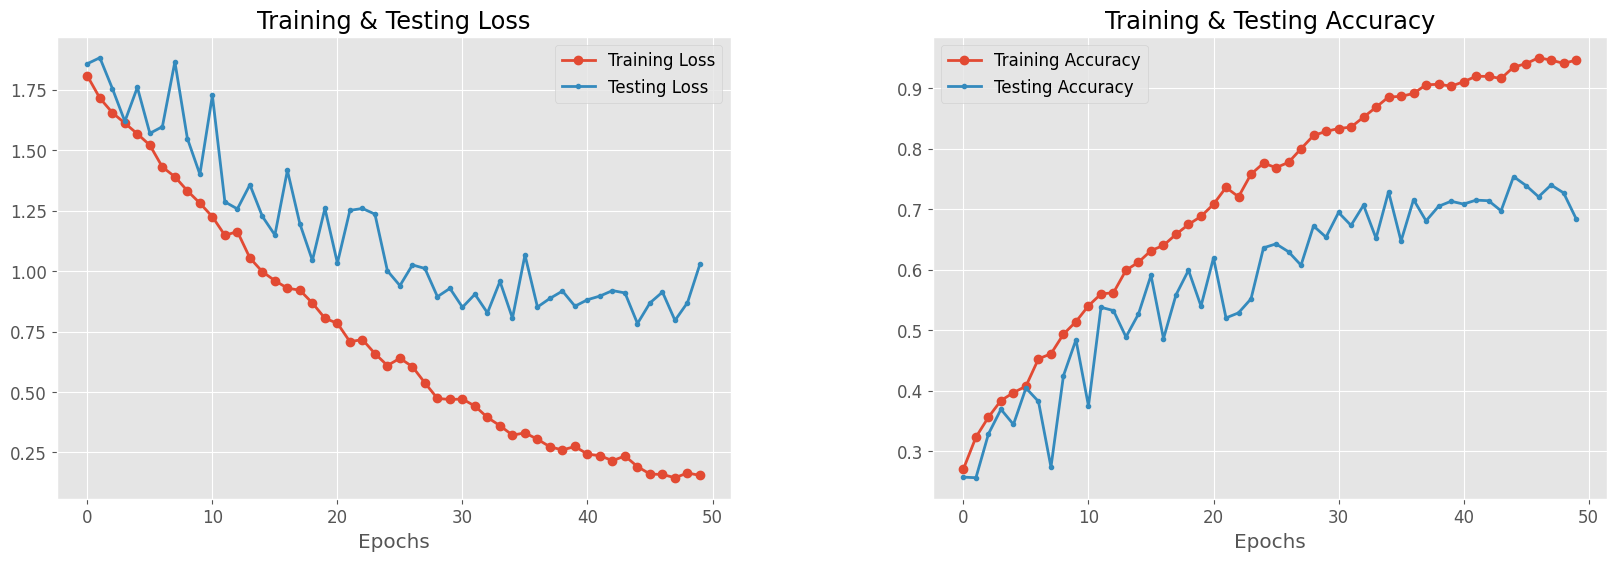

In [67]:
# Menampilkan akurasi model pada data pengujian
print("Accuracy of our model on test data:", model.evaluate(x_test, y_test)[1] * 100, "%")

import matplotlib.pyplot as plt

# Menggunakan gaya yang valid dari gaya yang tersedia
plt.style.use('ggplot')  # Mengubah ke gaya yang valid
plt.rcParams.update({'font.size': 12})
epochs = [i for i in range(50)]
fig, ax = plt.subplots(1, 2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

# Mengatur ukuran grafik
fig.set_size_inches(20, 6)

# Memplot train loss dan testing loss
ax[0].plot(epochs, train_loss, label='Training Loss', marker='o', linewidth=2)
ax[0].plot(epochs, test_loss, label='Testing Loss', marker='.', linewidth=2)
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

# Memplot akurasi pelatihan dan pengujian
ax[1].plot(epochs, train_acc, label='Training Accuracy', marker='o', linewidth=2)
ax[1].plot(epochs, test_acc, label='Testing Accuracy', marker='.', linewidth=2)
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")

# Mengatur jarak antara subplot
plt.subplots_adjust(wspace=0.3)
plt.show()

## K-Fold Cross Validation & Hyperparameter Tuning

In [48]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Activation, BatchNormalization, Dropout, MaxPooling1D, Flatten, Dense
import numpy as np

# Mendefinisikan fungsi untuk membuat model
def create_model(optimizer='adam', dropout_rate=0.25, filters=64):
    model = Sequential()
    model.add(Conv1D(filters, 8, padding='same', input_shape=(x_train.shape[1], 1)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Conv1D(filters, 8, padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))
    model.add(MaxPooling1D(pool_size=8))
    model.add(Flatten())
    model.add(Dense(y_train.shape[1], activation='softmax'))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Wrap model dalam KerasClassifier
model = KerasClassifier(model=create_model, epochs=10, batch_size=32, verbose=0)

In [41]:
# Mendefinisikan grid hyperparameter
param_grid = {
    'model__optimizer': ['adam', 'rmsprop'],
    'model__dropout_rate': [0.25, 0.5],
    'model__filters': [64, 128],
    'epochs': [10, 20],
    'batch_size': [32, 64]
}

In [38]:
# Menstandardisasi dataset
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.reshape(-1, x_train.shape[1])).reshape(x_train.shape)

In [42]:
# Mendefinisikan k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [43]:
# Menyiapkan GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, n_jobs=-1)

In [49]:
# Fit the model
grid_result = grid.fit(x_train_scaled, y_train)

### Menampilkan best parameter dari hasil gridsearch

In [50]:
# Menampilkan parameter terbaik dan skor terbaik dari grid search
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")

Best: 0.65 using {'batch_size': 32, 'epochs': 20, 'model__dropout_rate': 0.25, 'model__filters': 128, 'model__optimizer': 'rmsprop'}


### Train cnn model dengan best parameter yang diperoleh

In [51]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Mendapatkan parameter terbaik
best_params = grid_result.best_params_
best_model = grid_result.best_estimator_.model_

# Mengatur callback untuk pengurangan laju pembelajaran
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, patience=4, min_lr=1e-7, verbose=1)

# Melatih model dengan parameter terbaik pada seluruh set pelatihan
history = best_model.fit(
    x_train_scaled, y_train,
    batch_size=best_params['batch_size'],
    epochs=50,
    validation_data=(x_test, y_test),
    callbacks=[rlrp]
)

# Evaluasi pada set pengujian
test_loss, test_accuracy = best_model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")


Epoch 1/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.8442 - loss: 0.4741 - val_accuracy: 0.6963 - val_loss: 1.0225 - learning_rate: 0.0010
Epoch 2/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.8423 - loss: 0.4885 - val_accuracy: 0.6639 - val_loss: 1.2482 - learning_rate: 0.0010
Epoch 3/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8551 - loss: 0.4085 - val_accuracy: 0.6435 - val_loss: 1.2874 - learning_rate: 0.0010
Epoch 4/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8518 - loss: 0.4312 - val_accuracy: 0.6769 - val_loss: 1.1965 - learning_rate: 0.0010
Epoch 5/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8645 - loss: 0.3959 - val_accuracy: 0.6824 - val_loss: 1.1617 - learning_rate: 0.0010
Epoch 6/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8685 - loss: 0.3863 - val_accuracy: 0.6787 - val_loss: 1.2803 - learning_rate: 0.0010
Epoch 7/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8835 - loss: 0.

### Cari akurasi pada dataset test dan plot training & test akurasi

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7326 - loss: 1.4838
Accuracy of our model on test data: 75.56%


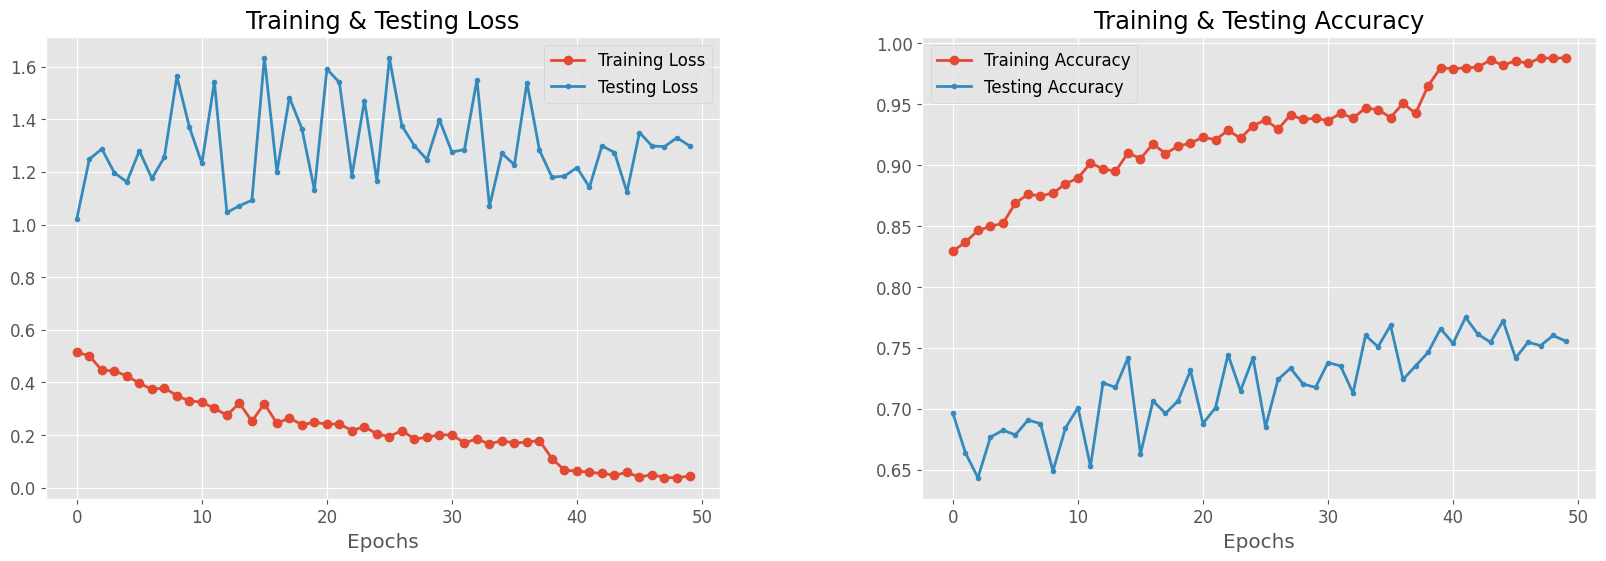

In [53]:
# Evaluasi model terbaik pada data pengujian
best_model = grid_result.best_estimator_.model_
test_loss, test_accuracy = best_model.evaluate(x_test, y_test)
print(f"Accuracy of our model on test data: {test_accuracy * 100:.2f}%")

import matplotlib.pyplot as plt

# Menggunakan gaya yang valid
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 12})

# Mendefinisikan rentang epoch
epochs = range(len(history.history['accuracy']))
fig, ax = plt.subplots(1, 2)

# Mendapatkan data akurasi dan loss selama pelatihan dan pengujian
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

# Mengatur ukuran grafik
fig.set_size_inches(20, 6)

# Memplot loss pelatihan dan pengujian
ax[0].plot(epochs, train_loss, label='Training Loss', marker='o', linewidth=2)
ax[0].plot(epochs, test_loss, label='Testing Loss', marker='.', linewidth=2)
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

# Memplot akurasi pelatihan dan pengujian
ax[1].plot(epochs, train_acc, label='Training Accuracy', marker='o', linewidth=2)
ax[1].plot(epochs, test_acc, label='Testing Accuracy', marker='.', linewidth=2)
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")

# Mengatur jarak antara subplot
plt.subplots_adjust(wspace=0.3)
plt.show()

## Evaluasi
Memprediksi model pada dataset test

In [58]:
# Memprediksi pada set pengujian
pred_test = best_model.predict(x_test)

# Mengonversi prediksi ke format label
y_pred_labels = np.argmax(pred_test, axis=1)
y_pred = encoder.inverse_transform(pred_test)

# Mengonversi label asli ke format label
y_test_decoded = encoder.inverse_transform(y_test)


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


### Memprediksi dengan memplot label prediksi dengan label sebenarnya (ture label)

In [61]:
# Memastikan y_pred dan y_test_decoded adalah array 1D
y_pred = y_pred.flatten()
y_test_decoded = y_test_decoded.flatten()

# Membuat DataFrame dengan label prediksi dan label asli
df = pd.DataFrame({
    'Predicted Labels': y_pred,
    'Actual Labels': y_test_decoded
})

# Menampilkan beberapa baris pertama dari DataFrame
display(df.head())


Predicted Labels Actual Labels
0             fear          fear
1            angry         angry
2             fear          fear
3          neutral       neutral
4            angry         angry

### Menghitung dan memplot confusion matrix dengan heatmap

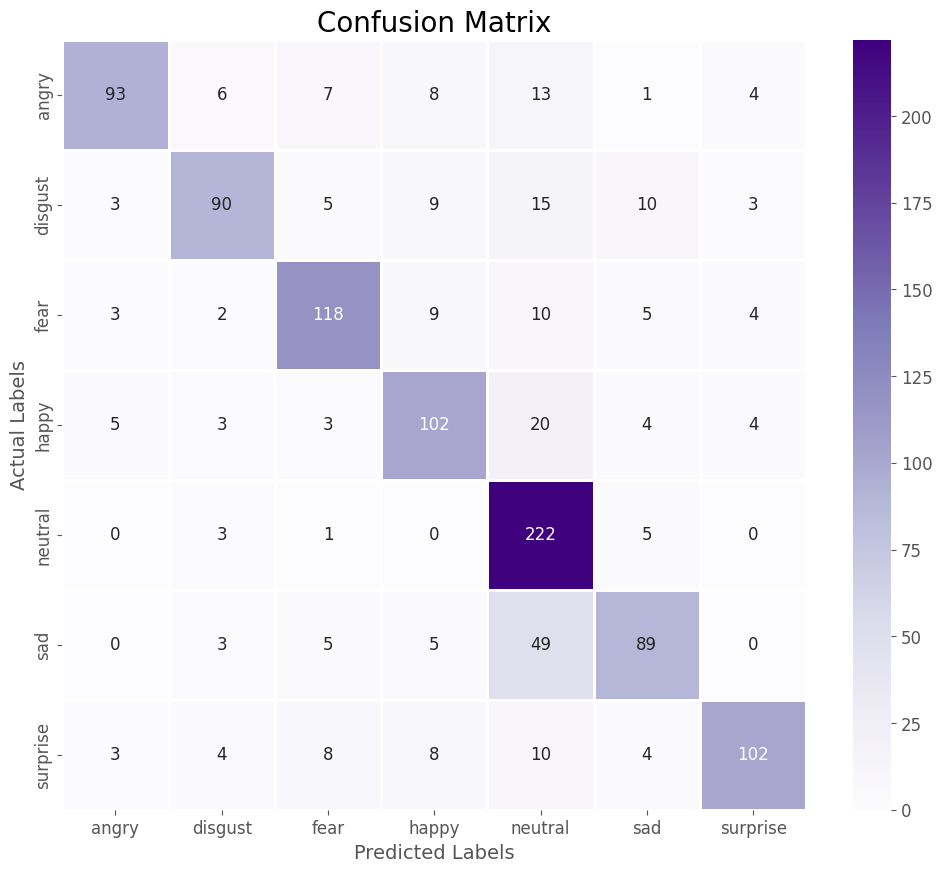

In [62]:
# Menghitung confusion matrix
cm = confusion_matrix(y_test_decoded, y_pred)

# Membuat DataFrame untuk confusion matrix
cm_df = pd.DataFrame(cm, index=encoder.categories_[0], columns=encoder.categories_[0])

# Memplot confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm_df, annot=True, cmap='Purples', fmt='d', linecolor='white', linewidths=1)
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

### Menampilkan f1-score

In [64]:
# Menampilkan/mencetak classification report
print(classification_report(y_test_decoded, y_pred))

              precision    recall  f1-score   support

       angry       0.87      0.70      0.78       132
     disgust       0.81      0.67      0.73       135
        fear       0.80      0.78      0.79       151
       happy       0.72      0.72      0.72       141
     neutral       0.65      0.96      0.78       231
         sad       0.75      0.59      0.66       151
    surprise       0.87      0.73      0.80       139

    accuracy                           0.76      1080
   macro avg       0.78      0.74      0.75      1080
weighted avg       0.77      0.76      0.75      1080



## Save best model

In [1]:
import joblib
from tensorflow.keras.models import save_model

# Menyimpan model terbaik
save_model(best_model, 'best_model.keras')

# Menyimpan scaler dan encoder
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(encoder, 'encoder.pkl')